In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

In [3]:
source_df = pd.read_pickle('./resources/temp_file/2023_inves.pkl')
source_df: pd.DataFrame
source_df

,序号,用户ID,提交答卷时间,所用时间,来源,来源详情,来自IP,总分,基本信息：—序号：,1、工作地址：,...,51、请选择肝包虫类型：（）？\n,52、请选择肝包虫类型：（）？\n,53、请选择肝包虫类型：（）？\n,54、请选择肝包虫类型：（）？\n,55、请选择肝包虫类型：（）？\n,56、请选择肝包虫类型：（）？\n,57、请选择肝包虫类型：（）？\n,58、请选择肝包虫类型：（）？\n,59、请选择肝包虫类型：（）？\n,60、请选择肝包虫类型：（）？\n
0,8,o_d200hJcXBqNIFEOCU40u_15vyU,2023/9/9 15:13:27,161秒,微信,张梅,39.144.143.208(四川-广安),120,4,四川-眉山市-东坡区,...,-3,1,-3,2,2,-3,-3,1,-3,2
1,9,o_d200v6eVUti_ffIwzTja21SrrY,2023/9/9 15:13:46,176秒,微信,卡萨布兰卡,171.92.117.217(四川-成都),90,23,四川-凉山彝族自治州-美姑县,...,1,1,-3,2,-3,2,-3,-3,-3,-3
2,10,o_d200pkcHyjBZrWBegRkLil5_28,2023/9/9 15:13:46,177秒,微信,康忙北鼻,139.204.128.165(四川-乐山),135,14,四川-南充市-西充县,...,1,-3,-3,-3,2,-3,-3,1,-3,2
3,11,o_d200pBkU2B0gMkI9t5emxy9h8g,2023/9/9 15:13:47,154秒,微信,郑川军18482117533,101.206.168.134(四川-成都),75,7,四川-绵阳市-涪城区,...,-3,1,1,2,-3,2,2,-3,-3,1
4,12,o_d200gyjI_CdBTT-dkwqt6uWVvI,2023/9/9 15:13:49,94秒,微信,Cloudy°,171.219.108.103(四川-成都),95,09,四川-绵阳市-涪城区,...,2,1,1,1,-3,1,-3,-3,1,-3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,76,o_d200m0_789-Po-EcJ00nyb8E9g,2023/9/9 15:40:05,1393秒,微信,_xD83E__xDD8B_ .,171.220.139.20(四川-成都),65,B,四川-绵阳市-涪城区,...,-3,-3,1,-3,2,2,2,-3,-3,2
69,77,o_d200kr9yZltEc0aiU3zgRY2kd4,2023/9/9 16:01:24,343秒,微信,蔡迪明,223.104.220.104(四川-成都),120,CAI,四川-成都市-武侯区,...,1,-3,-3,-3,1,-3,1,-3,2,1
70,78,o_d200oNOvSN3eZ8YjHoaVH6F77Y,2023/9/9 16:04:28,283秒,微信,Ren,116.169.5.33(四川-成都),135,任叶蕾,四川-成都市-武侯区,...,-3,-3,1,-3,-3,-3,1,-3,1,1
71,79,o_d200nAUnP5Ze8urFCLoP8EoiDw,2023/9/9 17:37:23,168秒,微信,廖沙,171.218.53.142(四川-成都),110,0,四川-成都市-武侯区,...,1,-3,1,-3,-3,-3,1,1,1,-3


In [3]:
a = list('1'*15)
b = list('0'*15)
c = list('1'*15)
d = list('0'*15)
answer_list = a + b + c + d
answer_list = list(map(int, answer_list))
print(len(answer_list), answer_list)

60 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [4]:
# 查看每道题有多少人做
num_list = []
for i in range(60):
    num = np.sum(~(source_df.iloc[:, i] == -3))
    num_list.append(num)

In [5]:
np.max(num_list), np.min(num_list), np.mean(num_list)

(45, 27, 36.5)

In [6]:
# 查看是否有题没有人做
np.sum(np.array(num_list) == 0)

0

<BarContainer object of 60 artists>

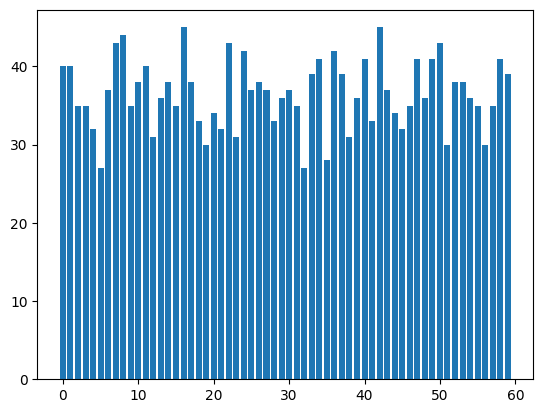

In [19]:
fig, ax = plt.subplots()
ax.bar(range(60), num_list)

In [8]:
# 计算每道题的概率，即患者有多少可能预测该图是AE
# 设概率为预测 AE 的概率
predict_AE_prob_list = []
for i, num in enumerate(num_list):
    predict_AE_num = np.sum(source_df.iloc[:, i] == 2)
    predict_AE_prob = predict_AE_num / num
    predict_AE_prob_list.append(predict_AE_prob)

In [9]:
print(len(predict_AE_prob_list), predict_AE_prob_list[0])

60 0.9


In [15]:
roc_auc_score(answer_list, predict_AE_prob_list)

0.8972222222222221

In [20]:
mask = predict_AE_prob_list >= 0.5

In [33]:
type(predict_AE_prob_list)

numpy.ndarray

In [30]:
predict_result = np.ones(60)
predict_result[mask] = 1
predict_result[~mask] = 0
print(predict_result, mask)

[1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1.] [ True False False  True  True  True  True  True  True  True  True  True
 False False  True False False False False False False False False  True
 False False False False False False  True False False False False  True
  True  True  True  True  True  True  True  True  True False False False
 False False False False False  True  True False  True False  True  True]


In [32]:
accuracy_score(answer_list, predict_result)

0.7666666666666667

In [12]:
# df = pd.DataFrame(columns=['Label', 'Pred'])
# df['Label'] = answer_list
# df['Pred'] = predict_AE_prob_list
# df.to_csv('./resources/graphpad/inves_prob_2023.csv', index=False)

In [ ]:
# 用GraphPad进行验证
# answer_list = np.array(answer_list)
# predict_AE_prob_list = np.array(predict_AE_prob_list)
# roc_auc_score(answer_list, predict_AE_prob_list)
# # 取出所有答案为0或1的概率
# predict_AE_prob_0 = predict_AE_prob_list[answer_list == 0]
# predict_AE_prob_1 = predict_AE_prob_list[answer_list == 1]
# len(predict_AE_prob_0), len(predict_AE_prob_1)
# df = pd.DataFrame(columns=['0_prob', '1_prob'])
# df['0_prob'] = predict_AE_prob_0
# df['1_prob'] = predict_AE_prob_1
# df.head()
# df.to_csv('./resources/source_data/inves_prob_2023.csv', index=False)